# <center> Investigate a Dataset | Titanic Data</center></h1>
<hr>

# 1. Introduction to the Project

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

I am given the dataset that contains demographics and passenger information for 891 of the 2224 passengers and crew on board. My objective is to discover useful information, suggesting conclusions, and supporting decision-making.

# 2. Introduction to the Dataset

Let's have a quick look to the Data Dictionary.

|Variable |Definition|	Key                                                     |
|---------|---------------------------------------------------------------------|
|survival |	Survival|	0 = No, 1 = Yes                                         |
|pclass	 |Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
|sex	 |Sex | male, female
|Age	     |Age in years	| numbers
|sibsp	 |# of siblings / spouses| numbers
|parch	 |# of parents / children| numbers
|ticket	 |Ticket number	| character
|fare	 |Passenger fare	| number
|cabin	 |Cabin number	| character
|embarked |	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton

A small note of the variables:

<b>pclass</b>: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

<b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

<b>sibsp</b>: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

<b>parch</b>: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch = 0 for them.
  

# 3. Data Analysis

So, now I'll analyze the data to find some interesting things. The phases will include:

<ol>
    <li>Questions, I want to answer!</li>
    <li>Data Wrangling</li>
        <ol type="a">
            <li>Data Acquisation</li>
            <li>Data Cleaning</li>
        </ol>
        <br>
    <li>Exploration</li>
    <li>Conclusion</li>
</ol>

## 3.1 Questions, I want to answer!

There's a well know truth that Titanic did not have enough number of lifeboats present. Many people died due to die due to this fact alone. So, there's a kind of <b>preference</b> that must be observed during saving of life in this scenario. Can we find it with the survival stats? Here's a step by step approach I did to find the answer.

************ FILL IN BITCH *************

## 3.2 Data Wrangling
## 3.2.1 Data Acquisation

In [1]:
# reading the dataset and using basic pandas to see and analyze.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("titanic-data.csv")
print titanic_df.head()
print titanic_df.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

### Observations

Some basic findings worth noting:

1. The survival rate of any passenger is 38%.
2. Most people travelled is from the type II (middle) Socio-economic Status.
3. The average age is 29 years.
4. There is about 50% chance of having sibling/spouse/husband relationship.
5. There is about 38% chance of having parent/child relationship.
6. The average fare is 32.

Some <b>errors</b> in the dataset are as follows:
1. Age has 714 entries. That means there are some empty entries.
2. Minimum Fare is 0. Is that possible in an expensive ship like Titanic?

## 3.2.2 Data Cleaning

Now I am curoious to find which other non-numeric columns have NAN values in them.

In [2]:
# finding NULL content in the non-numeric columns
print titanic_df["Name"][titanic_df["Name"].isnull()].size
print titanic_df["Sex"][titanic_df["Sex"].isnull()].size
print titanic_df["Ticket"][titanic_df["Ticket"].isnull()].size
print titanic_df["Cabin"][titanic_df["Cabin"].isnull()].size
print titanic_df["Embarked"][titanic_df["Embarked"].isnull()].size

0
0
0
687
2


Now since we have found three columns with NAN, we have to decide what we can do with them. We have 2 options - <b>impute</b> them OR <b>delete</b> them. But, <b>deleting</b> will result in a <b>total loss</b> of data, whereas <b>imputing</b> will result in a <b>biasing</b> of data. 

Now we came upon this percentages,
1. Column["Age"] has 177 NAN out of 891 entries = 19.8%
2. Column["Cabin"] has 687 NAN out of 891 entries =  77.1%
3. Column["Embarked"] has 2 NAN out of 891 entries = 0.2%

Now what we can do here in this case is impute the missing values. But we have not yet covered the process of doing so. So, we would rather drop the cabin have no significance.

And I will just try to find the co-relations among the other variables without imputing as pandas simply don't take into account the missing values.

Here are some columns and actions which we think should be applied on them.

1. <b>PassengerId</b> → seems <b>irrelevant</b>. So we consider <b>dropping</b> it.
2. <b>Name</b> → We would rather try to <b>extract the salutation</b> and find some co-relations of survival with it. Then we can consider <b>dropping</b> it.
1. <b>Age</b> → We keep the NaN values as it is, because the exact process and model for imputation is unknown.
3. <b>SibSp & Parch</b> → We must <b>create a new column "group"</b> which holds how many family members the passenger boarded with.
4. <b>Cabin</b> → We already discussed this column is not much useful with so many <b>missing values</b>. We will <b>drop</b> it. 
1. <b>Embarked</b> → Keep it as it is. 

Creating and filling the columns called "Salutation" and "Groups".

We can observe from the above description that a name like [Braund, Mr. Owen Harris] → [Surname, Salutation, First name, Second Name], which implies the second word is salutation.

In [4]:
# filling the new column named "Salutation" with the second part of the name
titanic_df["Salutation"] = titanic_df["Name"].str.split(" ").str[1]
titanic_df["Group"] = titanic_df["SibSp"] + titanic_df["Parch"]

We can now see, how many "Salutation"s we have.

In [5]:
# printing the "Salutation" column
titanic_df.groupby("Salutation").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group
Salutation,,,,,,,,,,,,,
"Billiard,",1,1,1,1,1,1,1,1,1,1,0,1,1
Capt.,1,1,1,1,1,1,1,1,1,1,1,1,1
"Carlo,",1,1,1,1,1,1,1,1,1,1,0,1,1
Col.,2,2,2,2,2,2,2,2,2,2,1,2,2
"Cruyssen,",1,1,1,1,1,1,1,1,1,1,0,1,1
Don.,1,1,1,1,1,1,1,1,1,1,0,1,1
Dr.,7,7,7,7,7,6,7,7,7,7,3,7,7
"Gordon,",2,2,2,2,2,2,2,2,2,2,2,2,2
"Impe,",3,3,3,3,3,3,3,3,3,3,0,3,3


We have some Salutations like "y", "the", "der" etc which we have never heard of and they also makes no sense.

So, we may conclude to delete "Salutation" also.

In [6]:
# Dropping PassengerId, Name, Salutation, Cabin
titanic_df = titanic_df.drop("PassengerId", 1)
titanic_df = titanic_df.drop("Name", 1)
titanic_df = titanic_df.drop("Salutation", 1)
titanic_df = titanic_df.drop("Cabin", 1)

In [7]:
# seeing the new modified DataFrame
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Group
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,female,35.0,1,0,113803,53.1000,S,1
4,0,3,male,35.0,0,0,373450,8.0500,S,0


Now, we have fixed all the NAN-filled columns. Our next thing to check is if all the cells have a clear meaning of minimum values. (Ex: Age = 0, Fare = 0 will have no meaning). We have already found FARE to be one of them. So, just checking them before moving to the next analysis.

In [73]:
titanic_df["Fare"][titanic_df["Fare"] == 0].size

15

So, we have 15 fares with 0\$, which seems quite impossible in a costly ship like Titanic. But the models of imputing with either mean-median-mode does not seem promising. So, skipping it.

## 3.3 Data Exploration

### 3.3.1 How socio-economic class is distributed in the total dataset.

The main idea is to find how many people belonged to which class in the RMS Titanic.

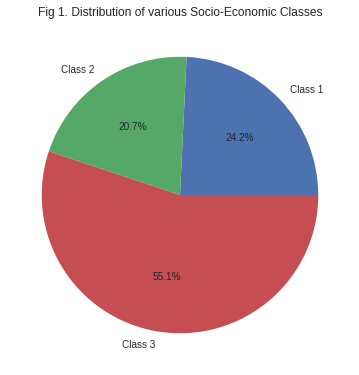

In [75]:
# getting total number of records with class as 1, 2 and 3
class1 = titanic_df["Pclass"][titanic_df["Pclass"]==1].size
class2 = titanic_df["Pclass"][titanic_df["Pclass"]==2].size
class3 = titanic_df["Pclass"][titanic_df["Pclass"]==3].size

# plotting the distribution of three classes 1, 2 and 3
plt.figure(1, figsize=(6,6))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
plt.pie([class1, class2, class3], labels=["Class 1", "Class 2", "Class 3"], autopct='%1.1f%%')
plt.title("Fig 1. Distribution of various Socio-Economic Classes")

### Observation

The RMS Titanic had maximum passengers from the socio-economic class 3, followed by socio-economic class 2 and class 1.

### 3.3.2 How is Fare related to various Socio-economic Class?

We try to explore the <b>notion</b> - "People from higher socio-economic class will buy tickets of higher price".

In [11]:
# trying to find if there's a margin of ticket fare of the 3 classes 
print titanic_df[titanic_df["Fare"] != 0].groupby("Pclass")["Fare"].min()
print titanic_df[titanic_df["Fare"] != 0].groupby("Pclass")["Fare"].max()
print titanic_df[titanic_df["Fare"] != 0].groupby("Pclass")["Fare"].mean()

Pclass
1     5.0000
2    10.5000
3     4.0125
Name: Fare, dtype: float64
Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64
Pclass
1    86.148874
2    21.358661
3    13.787875
Name: Fare, dtype: float64


So, we can see that "Passenger Class" is <b>not dependent</b> on the "Fare" of the ticket he has bought. 1st class passenger is buying a ticket of 5\$ which is way less than the mean fare (86\$) of 1st class. Also such intermixing can be seen from the above statistics. We may <b>plot</b> a grpah to see the intermixing.

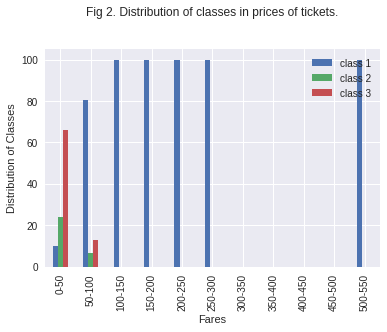

In [89]:
# the list to store class distribution in the given fare ranges
fare_class_plot=[]

# function to form the list of lists contianing the class distribution
def fare_class(i, j):
    temp = []
    total_class = titanic_df["Pclass"][(titanic_df["Fare"]>i) & (titanic_df["Fare"]<j)].size
    total_class1 = titanic_df["Pclass"][(titanic_df["Fare"]>i) & (titanic_df["Fare"]<j) & (titanic_df["Pclass"]==1)].size
    total_class2 = titanic_df["Pclass"][(titanic_df["Fare"]>i) & (titanic_df["Fare"]<j) & (titanic_df["Pclass"]==2)].size
    total_class3 = titanic_df["Pclass"][(titanic_df["Fare"]>i) & (titanic_df["Fare"]<j) & (titanic_df["Pclass"]==3)].size
    
    
    if total_class == 0:
        temp.append(0)
    else:
        temp.append(total_class1/(total_class*1.0)*100)
        temp.append(total_class2/(total_class*1.0)*100)
        temp.append(total_class3/(total_class*1.0)*100)

    fare_class_plot.append(temp)
    
# looping over various fare ranges to form the list
for i in xrange(0, 550, 50):
    fare_class(i, i+50)
    
# converting the 2D list into a DataFrame
fare_class_plot_df = pd.DataFrame(fare_class_plot, columns=["class 1", "class 2", "class 3"], index=['0-50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500','500-550'])

# Plotting the DataFrame
ax = fare_class_plot_df.plot(kind='bar')
ax.set_xlabel("Fares")
ax.set_ylabel("Distribution of Classes")
ax.set_title("Fig 2. Distribution of classes in prices of tickets.\n\n")

### Observation

1. Tickets within range 0\$-50\$ is bought mainly by Class 3 people. However Class 2 and Class 1 people also bought ticket within that range.
2. Tickets within range 50\$-100\$ is bought at max by Class 1 people. However Class 3 and Class 2 people also bought ticket within that range.
3. All other tickets from 100\$-512\$ is bought by the Class 1 people only.

### 3.3.3 Survival Rate of Various Socio-economic Class

We may now try to observe how survival rate varied as per socio-economic class. This may give us an insight if there were any preferences of class during evacuation

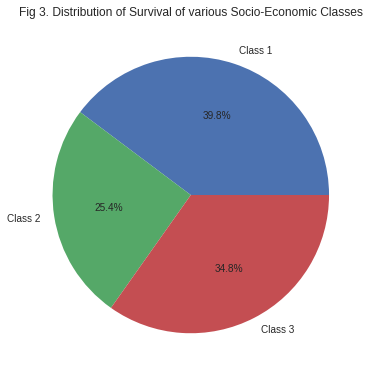

In [77]:
# getting the number of survived passengers of the 3 classes
total_survived_class1 = titanic_df["Pclass"][(titanic_df["Survived"] == 1) & (titanic_df["Pclass"]==1)].size
total_survived_class2 = titanic_df["Pclass"][(titanic_df["Survived"] == 1) & (titanic_df["Pclass"]==2)].size
total_survived_class3 = titanic_df["Pclass"][(titanic_df["Survived"] == 1) & (titanic_df["Pclass"]==3)].size

# plotting the distribution of classes
plt.figure(1, figsize=(6,6))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
plt.pie([total_survived_class1, total_survived_class2, total_survived_class3], labels=["Class 1", "Class 2", "Class 3"], autopct='%1.1f%%')
plt.title("Fig 3. Distribution of Survival of various Socio-Economic Classes")

### Observation

We can see survival rate of Class 1 is highest, followed by Class 1 and then Class 2.

So, we may conclude there was some preferece given to people from higher socio-economic class. 

### 3.3.4 Survival Rate on basis of Fare

Now we are again interested to find the same notion - if higher ticket price played any role in survival rate. Let's find out.

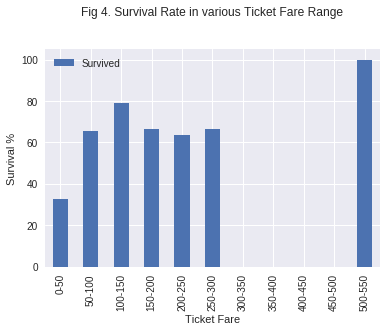

In [78]:
fare_survival_plot=[]

# function to create 2D list for survival rate of various range of fares
def fare_survival(i, j):
    total = titanic_df["Fare"][(titanic_df["Fare"]>i) & (titanic_df["Fare"]<j)].size
    total_survived = titanic_df["Fare"][(titanic_df["Fare"]>i) & (titanic_df["Fare"]<j) & (titanic_df["Survived"]==1)].size
    
    if total == 0:
        fare_survival_plot.append(0)
    else:
        fare_survival_plot.append(total_survived/(total*1.0)*100)

# looping over each fare range to generate it's survival rate
for i in xrange(0, 550, 50):
    fare_survival(i, i+50) 
    
# plotting the above concept
fare_survival_plot_df = pd.DataFrame(fare_survival_plot, index=['0-50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500','500-550'], columns=["Survived"])
ax = fare_survival_plot_df.plot(kind = 'bar')
ax.set_xlabel("Ticket Fare")
ax.set_ylabel("Survival %")
ax.set_title("Fig 4. Survival Rate in various Ticket Fare Range\n\n")

### Observation

We can see that the least fare range (mainly bought by class 3 people) has the least survival rate. And the last ticket range (mainly bought by class 1 people) has the best survival rate.

We may conclude that there was a preference for class 1 people and people with higher ticket price.

### 3.3.5 Survival rate on the basis of Embarked Port

We may be interested on finding if people from a particular port has a higher survival rate.

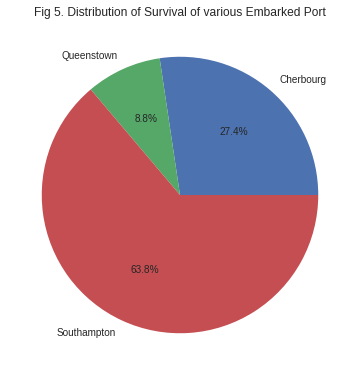

In [79]:
# getting the number of passengers embarked from different ports
total_survived_C = titanic_df["Embarked"][(titanic_df["Survived"] == 1) & (titanic_df["Embarked"]=="C")].size
total_survived_Q = titanic_df["Embarked"][(titanic_df["Survived"] == 1) & (titanic_df["Embarked"]=="Q")].size
total_survived_S = titanic_df["Embarked"][(titanic_df["Survived"] == 1) & (titanic_df["Embarked"]=="S")].size

# plotting the distribution of the embarkation ports
plt.figure(1, figsize=(6,6))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
plt.pie([total_survived_C, total_survived_Q, total_survived_S], labels=["Cherbourg", "Queenstown", "Southampton"], autopct='%1.1f%%')
plt.title("Fig 5. Distribution of Survival of various Embarked Port")

### Observation

Quite a success! We have people from Queenstown with the lowest survival rate. This makes us curious to find how <b>embarked port</b> is associated with <b>class</b> and <b>ticket fare</b>.

### 3.3.6 How Embarked Port is related to Class and Ticket Fare?

Like we have just discussed, we got a high survival rate for Class 1 people as well as for people with high priced tickets. Again as our analysis says, there's a particular port on which survival rate is high. So, is there's a co-relation? Let's find it out.

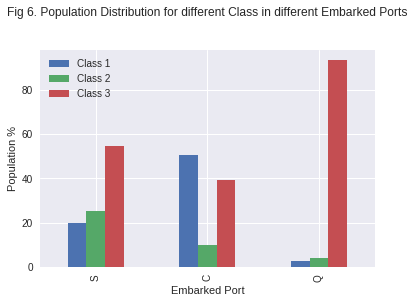

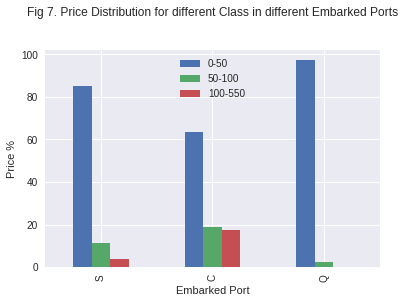

In [81]:
embarked_class_plot=[]

# function to generate 2D list containing class variation in the embarked ports
def embarked_class(i):
    total = titanic_df["Embarked"][(titanic_df["Embarked"]==i)].size
    total_1 = titanic_df["Embarked"][(titanic_df["Embarked"]==i) & (titanic_df["Pclass"]==1)].size
    total_2 = titanic_df["Embarked"][(titanic_df["Embarked"]==i) & (titanic_df["Pclass"]==2)].size
    total_3 = titanic_df["Embarked"][(titanic_df["Embarked"]==i) & (titanic_df["Pclass"]==3)].size
    
    a = total_1/(total*1.0)*100
    b = total_2/(total*1.0)*100
    c = total_3/(total*1.0)*100
    embarked_class_plot.append([a, b, c])
        
for i in ['S', 'C', 'Q']:
    embarked_class(i)

# plotting class variation in the embarked ports
embarked_class_plot_df = pd.DataFrame(embarked_class_plot, index=["S", "C", "Q"], columns=["Class 1", "Class 2", "Class 3"])
ax = embarked_class_plot_df.plot(kind = 'bar')
ax.set_xlabel("Embarked Port")
ax.set_ylabel("Population %")
ax.set_title("Fig 6. Population Distribution for different Class in different Embarked Ports\n\n")

embarked_fare_plot=[]

# function to generate 2D list containing fare variation in the embarked ports
def embarked_fare(i):
    total = titanic_df["Embarked"][(titanic_df["Embarked"]==i)].size
    total_1 = titanic_df["Embarked"][(titanic_df["Embarked"]==i) & (titanic_df["Fare"]>=0) & (titanic_df["Fare"]<50)].size
    total_2 = titanic_df["Embarked"][(titanic_df["Embarked"]==i) & (titanic_df["Fare"]>=50) & (titanic_df["Fare"]<100)].size
    total_3 = titanic_df["Embarked"][(titanic_df["Embarked"]==i) & (titanic_df["Fare"]>=100) & (titanic_df["Fare"]<550)].size
    
    a = total_1/(total*1.0)*100
    b = total_2/(total*1.0)*100
    c = total_3/(total*1.0)*100
    embarked_fare_plot.append([a, b, c])
        
for i in ['S', 'C', 'Q']:
    embarked_fare(i)

# plotting fare variation in the embarked ports
embarked_fare_plot_df = pd.DataFrame(embarked_fare_plot, index=["S", "C", "Q"], columns=["0-50", "50-100", "100-550"])
ax = embarked_fare_plot_df.plot(kind = 'bar')
ax.set_xlabel("Embarked Port")
ax.set_ylabel("Price %")
ax.set_title("Fig 7. Price Distribution for different Class in different Embarked Ports\n\n")


### Observation

So, we are correct! 

The distribution of Class in Queenstown as we see the population had maximum of class 3 people and also had the least survival rate.

The Fare Distribution also shows that people from Queensland did not buy much costly ticket which can also be the cause of the low survival rate.

### 3.3.7 How survival rate of people varied with family?

We are now intersested to find how the survival rate of people varied with those who have either of sibling, spouse, parent or child and those who have not. One thing to remember, we already have a column group that takes into account the size of the family of a particular passenger. 

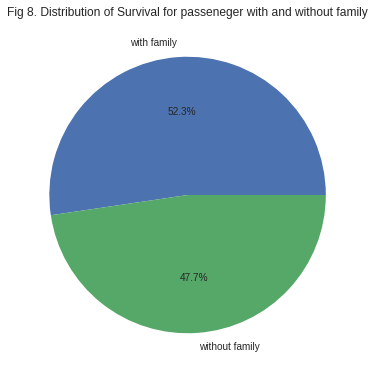

In [82]:
# plotting the distribution of passengers against family and without family
total_w_family = titanic_df["Group"][(titanic_df["Survived"] == 1) & (titanic_df["Group"]!= 0)].size
total_wo_family = titanic_df["Group"][(titanic_df["Survived"] == 1) & (titanic_df["Group"]==0)].size

plt.figure(1, figsize=(6,6))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
plt.pie([total_w_family, total_wo_family], labels=["with family", "without family"], autopct='%1.1f%%')
plt.title("Fig 8. Distribution of Survival for passeneger with and without family")

### Observation

Strange! We expected people without family to be evacuated easily without hassels of finding other lost family members. But things seems different. Most probably people without family gave way to those with a family.

### 3.3.8 How men and women were distributed in the population?

A long waited analysis - what were the number of men and women?

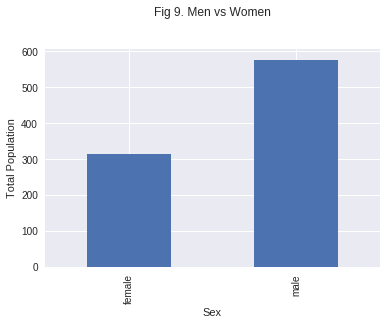

In [84]:
# plotting the distribution of sex amongst the passengers
div_sex = titanic_df.groupby('Sex')["Survived"].count()
ax = div_sex.plot.bar(title='Fig 9. Men vs Women\n\n')
ax.set_ylabel("Total Population")

### 3.3.9 Survival Rate of Male and Female

Once we have seen the distribution of male and female, we may also want to see the survival distribution of male and female.

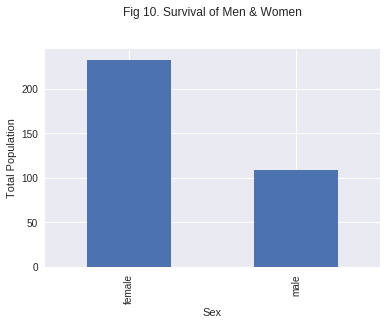

In [85]:
# plotting the survival of the sexes
div_sex = titanic_df[titanic_df["Survived"] == 1].groupby("Sex")["Survived"].count()
ax = div_sex.plot.bar(title='Fig 10. Survival of Men & Women\n\n')
ax.set_ylabel("Total Population")

### Observation

We can see a clear trend! We can make a mere conclusion that women were rescued first.

Taking this conclusion, let us investigate more to see other factors such as age in survival rate of the females.

### 3.3.10  How age played a role in survival ?

We all know that the rescue protocol is - "Save women and children first". We already a trend showing women were rescued first given their high survival rate. Let's see how age played a role in male, female and as a whole.

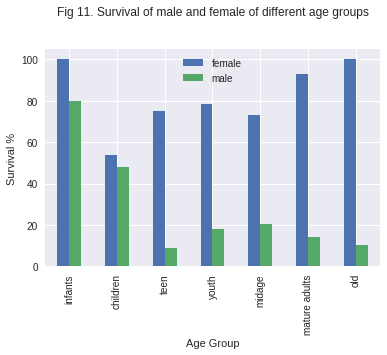

In [86]:
# the groups based on age
# infants (0-1)
# children (2-12)
# teen (13-18)
# youth (19-35)
# midage (36-50)
# mature adults (51-60)
# old (60+)

p_survival_plot = []

# function to form the 2D list for survival of male and female of different age groups
def p_survival(gr1, gr2):
    total_in_gr_f = titanic_df["Sex"][(titanic_df["Sex"] == "female") & ((titanic_df["Age"] >= gr1) & (titanic_df["Age"] < gr2))].size
    survived_in_gr_f = titanic_df["Sex"][(titanic_df["Sex"] == "female") & ((titanic_df["Age"] >= gr1) & (titanic_df["Age"] < gr2)) & (titanic_df["Survived"] == 1)].size
    #p_survival_plot.append((survived_in_gr_f/ (total_in_gr_f*1.0))*100)
    
    total_in_gr_m = titanic_df["Sex"][(titanic_df["Sex"] == "male") & ((titanic_df["Age"] >= gr1) & (titanic_df["Age"] < gr2))].size
    survived_in_gr_m = titanic_df["Sex"][(titanic_df["Sex"] == "male") & ((titanic_df["Age"] >= gr1) & (titanic_df["Age"] < gr2)) & (titanic_df["Survived"] == 1)].size
    p_survival_plot.append([((survived_in_gr_f/ (total_in_gr_f*1.0))*100), ((survived_in_gr_m/ (total_in_gr_m*1.0))*100)])
    
age = [0,2,13,19,36,51,61,81]
for i in range(1, len(age)):
    p_survival(age[i-1], age[i])
    
# plotting survival of male and female of different age groups
p_survival_plot_df = pd.DataFrame(p_survival_plot, columns=["female", "male"], index=["infants", "children", "teen", "youth", "midage", "mature adults", "old"])
ax = p_survival_plot_df.plot(kind = 'bar')
ax.set_xlabel("Age Group")
ax.set_ylabel("Survival %")
ax.set_title("Fig 11. Survival of male and female of different age groups\n\n")

### Observation

So, we can conclude the following points as from this.
1. Infant females have a survival rate of 100% as well as male infants have 80%. ("Babies First" was followed well).
2. Survival rate of female children is very less compared to other female age groups. (possibly they were unable to adapt to the extreme conditions). However male children have a very high survival rate. So, we can again conclude - <b>"children of both sex were given preference"</b>.
3. Survival of teenagers, youths and midaged people are more or less same for both sexes.
4. Finally mature adults and old aged people shows an impressive survival rate in females. So, these age grouped people also are given prefernece in females. However old males died highly due to the extreme weather.

### 3.3.11 We may want to see what is the distribution of class and survival rate of various classes in different  age groups.

Now as we have seen the survival rate of various age groups, we may try to extend our previuos conclusions by seeing more closely how the classes are spread in various age groups.

In [67]:
survival_class_age_plot = []
class_age_plot = []

# function to form 2D list for distribution of classes in various age groups and rate of survival of various ages
def p_survival_f1(gr1, gr2):
    temp = []
    total_in_gr_class1 = titanic_df["Sex"][((titanic_df["Age"] >= gr1) & (titanic_df["Age"] < gr2)) & (titanic_df["Pclass"] == 1) ].size
    total_in_gr_class2 = titanic_df["Sex"][((titanic_df["Age"] >= gr1) & (titanic_df["Age"] < gr2)) & (titanic_df["Pclass"] == 2) ].size
    total_in_gr_class3 = titanic_df["Sex"][((titanic_df["Age"] >= gr1) & (titanic_df["Age"] < gr2)) & (titanic_df["Pclass"] == 3) ].size
    
    survived_in_gr_class1 = titanic_df["Sex"][((titanic_df["Age"] >= gr1) & (titanic_df["Age"] < gr2)) & (titanic_df["Survived"] == 1) & (titanic_df["Pclass"] == 1) ].size
    survived_in_gr_class2 = titanic_df["Sex"][((titanic_df["Age"] >= gr1) & (titanic_df["Age"] < gr2)) & (titanic_df["Survived"] == 1) & (titanic_df["Pclass"] == 2) ].size
    survived_in_gr_class3 = titanic_df["Sex"][((titanic_df["Age"] >= gr1) & (titanic_df["Age"] < gr2)) & (titanic_df["Survived"] == 1) & (titanic_df["Pclass"] == 3) ].size
    if total_in_gr_class1:
        temp.append(survived_in_gr_class1 / (total_in_gr_class1*1.0)*100)
    else:
        temp.append(0)
    
    if total_in_gr_class2:
        temp.append(survived_in_gr_class2 / (total_in_gr_class2*1.0)*100)
    else:
        temp.append(0)
    
    if total_in_gr_class3:
        temp.append(survived_in_gr_class3 / (total_in_gr_class3*1.0)*100)
    else:
        temp.append(0)
        
    # appending distribution of classes in various age groups to the list
    survival_class_age_plot.append(temp)
    # appending rate of survival of various ages to the list
    class_age_plot.append([total_in_gr_class1, total_in_gr_class2, total_in_gr_class3])

for i in range(1, len(age)):
    p_survival_f1(age[i-1], age[i])

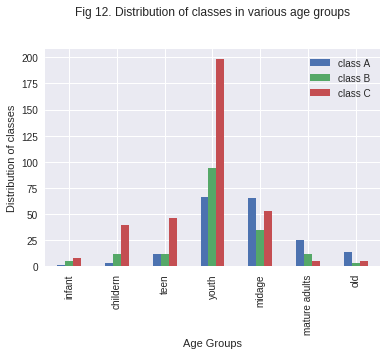

In [90]:
# plotting the distribution of classes in various age groupsclass_age_plot_df = pd.DataFrame(class_age_plot, index=['infant', 'childern', 'teen', 'youth', 'midage', 'mature adults', 'old'], columns=['class A', 'class B', 'class C'])
ax = class_age_plot_df.plot(kind = 'bar')
ax.set_ylabel("Distribution of classes")
ax.set_xlabel("Age Groups")
ax.set_title("Fig 12. Distribution of classes in various age groups\n\n") 

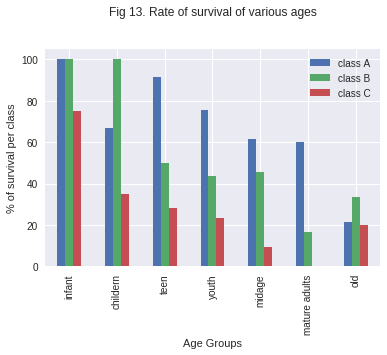

In [88]:
# plotting rate of survival of various ages
survival_class_age_plot_df = pd.DataFrame(survival_class_age_plot, index=['infant', 'childern', 'teen', 'youth', 'midage', 'mature adults', 'old'], columns=['class A', 'class B', 'class C'])
ax = survival_class_age_plot_df.plot(kind = 'bar')
ax.set_ylabel("% of survival per class")
ax.set_xlabel("Age Groups")
ax.set_title("Fig 13. Rate of survival of various ages\n\n")

### Observation

We can say that mostly mature adults and old people are from higher socio-economic status following the first graph.

And again based on various age groups we can clearly see the class C people least survived (even this is true for infants - sadly)

DONE : Now I want to find out is there's a relation of fare and socio-economic status?

So, we can clearly see that class2 and class3 passengers only bought tickets within range 0$-100$. However class1 people bought tickets of all ranges. So, we cannot say that higher class people is associated with higher ticket prices.

Distribution of ticket fare and survival rate

In [ ]:
distribution_of_fare_plot=[]

def distribution_of_fare(i, j):
    total = titanic_df["Fare"][(titanic_df["Fare"]>i) & (titanic_df["Fare"]<j)].size
    survived = titanic_df["Fare"][(titanic_df["Fare"]>i) & (titanic_df["Fare"]<j) & (titanic_df["Survived"] == 1)].size
    #print "******** SURVIVAL RATE IN FARE RANGE (" + str(i) + "$-" + str(j) + "$) ********"
    if total == 0:
        #print "No data.."
        distribution_of_fare_plot.append(0)
        return None
    #print str(survived) + "/" + str(total) + " = " + str(survived/(total*1.0) * 100) + "%"
    distribution_of_fare_plot.append(survived/(total*1.0) * 100)
    
for i in xrange(0, 550, 50):
    distribution_of_fare(i, i+50)
    
distribution_of_fare_plot_df = pd.DataFrame(distribution_of_fare_plot, columns=["survived"], index=['0-50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500','500-550'])
ax = distribution_of_fare_plot_df.plot(kind='bar')
ax.set_xlabel("Fares")
ax.set_ylabel("Survival %")
ax.set_title("Impact of Fare on Survival Rate\n\n")

## Improving Plots and Sharing Findings

In [3]:
# ************* RELATION WITH TICKET (to be deleted once implemented) *********************
#print titanic_df.groupby("Ticket").count()["Pclass"].max()


# imputing "Age" with mean
#titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].mean())
#titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace = True)

# imputing "Embarked" with mode
#titanic_df["Embarked"] = titanic_df.fillna(titanic_df["Embarked"].mode())
#titanic_df.fillna(titanic_df["Embarked"].mode()[0], inplace = True)

In [9]:
#print titanic_df["Sex"][(titanic_df["Sex"] == "female")].size
#print titanic_df["Sex"][(titanic_df["Sex"] == "female") & (titanic_df["Survived"] == 1)].size

#print titanic_df["Sex"][(titanic_df["Sex"] == "male")].size
#print titanic_df["Sex"][(titanic_df["Sex"] == "male") & (titanic_df["Survived"] == 1)].size